<a href="https://colab.research.google.com/github/pck196/Python_Assignment/blob/master/Python_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing pandas, numpy, matplotlib and seaborn
!pip3 install pandas --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Checking panda version
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.18.3
1.0.3
0.10.1


In [3]:
#Importing data file
df=pd.read_csv("https://github.com/pck196/Python_Assignment/raw/master/Playstore_Analysis_Data_Set.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Getting information on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
#Finding empty values in table
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **Tasks**

1. Data clean up – Missing value treatment.

a. Drop records where rating is missing since rating is our target/study variable.

In [0]:
#Deleting unwanted rows.
df.dropna(axis=0, how='any', subset=['Rating'], inplace = True)

In [7]:
#Checking if thier are any null values left.
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

-Their are no null values left in rating.

b. Check the null values for the Android Ver column.

> i. Are all 3 records having the same problem?

In [8]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


-Yes, all three records are having the same problem.

> ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [9]:
df.drop([10472], inplace=True)
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


> iii. Replace remaining missing values with the mode.

In [10]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


c. Current ver – replace with most common value.

In [11]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)
df.loc[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


2. Data clean up – correcting the data types.

a. Which all variables need to be brought to numeric types?

In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


-Reviews and installs need to be brought to numeric types.

b. Price variable – remove $ sign and convert to float.

In [0]:
price = []
for i in df['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)

In [0]:
df.drop(labels=df[df['Price']=='Everyone'].index, inplace = True)
df['Price']= price
df['Price']= df['Price'].astype('float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer.

In [0]:
installs = []
for j in df['Installs']:
    installs.append(j.replace(',','').replace('+','').strip())
df['Installs']= installs
df['Installs']= df['Installs'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


-Installs is converted to integer data type.


d. Convert all other identified columns to numeric.

In [0]:
df['Reviews']= df['Reviews'].astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


-Reviews is converted to integer data type.

3. Sanity checks – check for the following and handle accordingly.

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

>  i. Are there any such records? Drop if so.

In [20]:
df.loc[df['Rating'] < 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [21]:
df.loc[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


-No, There are no such records which have  Avg. rating below 1 and above 5.

b. Reviews should not be more than installs as only those who installed can review the app.

> i. Are there any such records? Drop if so.

In [22]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


-Yes, Their are 7 such records.

In [0]:
tdf = df[df['Reviews']>df['Installs']].index
df.drop(labels=tdf, inplace=True)

In [24]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


-Now there are no records left where Reviews are greater than Installs.

4. Identify and handle outliers.

a. Price column.

> i. Make suitable plot to identify outliers in price.

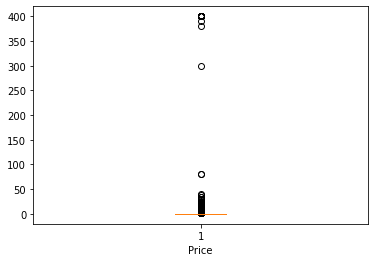

In [25]:
%matplotlib inline
plt.boxplot(df['Price'])
plt.xlabel('Price')
plt.show()

> ii. Do you expect apps on the play store to cost $200? Check out these cases.

In [26]:
df.loc[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


-Yes, We can expect apps on the play store to cost $200.

> iii. After dropping the useless records, make the suitable plot again to identify outliers.

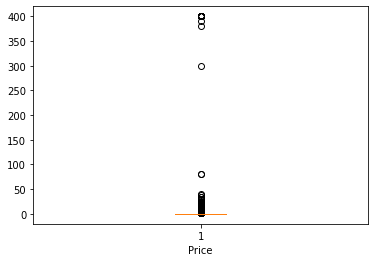

In [27]:
plt.boxplot(df['Price'])
plt.xlabel('Price')
plt.show()

> iv. Limit data to records with price < $30

In [0]:
dflt30 = df[df['Price'] > 30].index
df.drop(labels=dflt30, inplace=True)

In [29]:
count = df.loc[df['Price'] > 30].index
count.value_counts().sum()

0

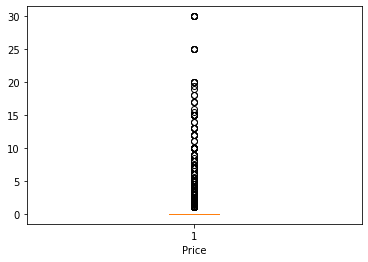

In [30]:
plt.boxplot(df['Price'])
plt.xlabel('Price')
plt.show()

b. Reviews column.

> i. Make suitable plot

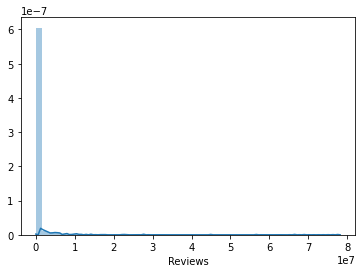

In [31]:
sns.distplot(df['Reviews'])
plt.show()

> ii. Limit data to apps with < 1 Million reviews.

In [32]:
dfl1m = df[df['Reviews'] > 1000000 ].index
df.drop(labels = dfl1m, inplace=True)
print(dfl1m.value_counts().sum(),'apps having more than 1 Millon reviews dropped.')

704 apps having more than 1 Millon reviews dropped.


c. Installs.

> i. What is the 95th percentile of the installs?

In [33]:
pctl = df.Installs.quantile(0.95)
print(pctl,"is the 95th percentile of the installs.")

10000000.0 is the 95th percentile of the installs.


> ii.Drop records having a value more than the 95th percentile.

In [34]:
for i in range(0,101,1):
    print(' the {} percentile of installs is {} '.format(i,np.percentile(df['Installs'],i)))

 the 0 percentile of installs is 5.0 
 the 1 percentile of installs is 50.0 
 the 2 percentile of installs is 100.0 
 the 3 percentile of installs is 100.0 
 the 4 percentile of installs is 100.0 
 the 5 percentile of installs is 100.0 
 the 6 percentile of installs is 500.0 
 the 7 percentile of installs is 500.0 
 the 8 percentile of installs is 1000.0 
 the 9 percentile of installs is 1000.0 
 the 10 percentile of installs is 1000.0 
 the 11 percentile of installs is 1000.0 
 the 12 percentile of installs is 1000.0 
 the 13 percentile of installs is 1000.0 
 the 14 percentile of installs is 1000.0 
 the 15 percentile of installs is 1000.0 
 the 16 percentile of installs is 5000.0 
 the 17 percentile of installs is 5000.0 
 the 18 percentile of installs is 5000.0 
 the 19 percentile of installs is 5000.0 
 the 20 percentile of installs is 5000.0 
 the 21 percentile of installs is 10000.0 
 the 22 percentile of installs is 10000.0 
 the 23 percentile of installs is 10000.0 
 the 24 pe

In [35]:
dft = df[df["Installs"] > pctl].index
print(dft.value_counts().sum(),'Records having a value more than the 95th percentile dropped.')
df.drop(labels = dft, inplace = True)

199 Records having a value more than the 95th percentile dropped.


5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

a. How do you explain this?

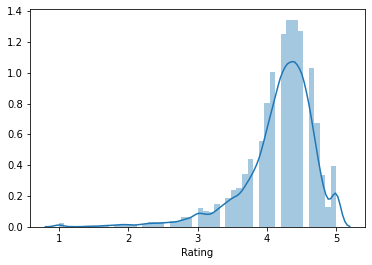

The Skewness of this distribution is -1.743.
The Median of this distribution 4.3 is greater than Mean 4.171 of this distribution.


In [36]:
sns.distplot(df['Rating'])
plt.show()
print('The Skewness of this distribution is',str(round(df['Rating'].skew(),3))+'.')
print('The Median of this distribution {} is greater than Mean {} of this distribution.'.format(df.Rating.median(),round(df.Rating.mean(),3)))

b. What is the implication of this on your analysis?

In [37]:
df['Rating'].mode()

0    4.3
dtype: float64

-Since Mode >= Median > Mean, The distribution of Rating is Negatively Skewed. That is distribution of Rating is more Skewed towards lower values.


6. What are the top Content Rating values?


a. Are there any values with very few records?

In [38]:
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

-Yes, Adults only 18+ and Unrated are values with very few records.

b. If yes, drop those as they won’t help in the analysis.

In [39]:
dft1 = df[df["Content Rating"] == 'Adults only 18+'].index
df.drop(labels=dft1, inplace=True)
df['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Unrated            1
Name: Content Rating, dtype: int64

-Adults only 18+ values droped.

In [40]:
dft2 = df[df["Content Rating"] == 'Unrated'].index
df.drop(labels=dft2, inplace=True)
df['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

-Unrated values droped.

7. Effect of size on rating.


a. Make a joinplot to understand the effect of size on rating.

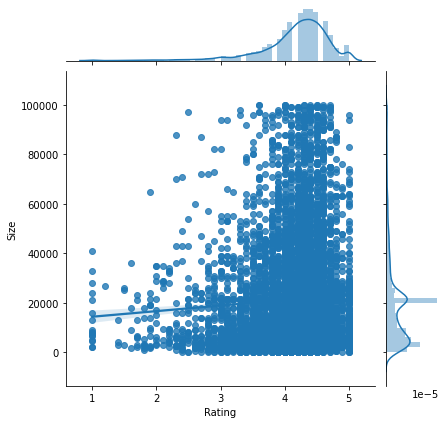

In [41]:
sns.jointplot(y ='Size', x ='Rating', data = df, kind ='reg')
plt.show()

b. Do you see any patterns?

-Yes, patterns can be seen between Size and Rating of apps.

c. How do you explain the pattern?

-As the Rating of an App increases, Size of an App also increases. Although, This is not true for each App, as their is constant Size for higher rated Apps. Therfore we can infer that their is positive correlation between Size and Rating. That is the slope of  the regression line is positive.

8. Effect of price on rating.

a. Make a jointplot (with regression line).

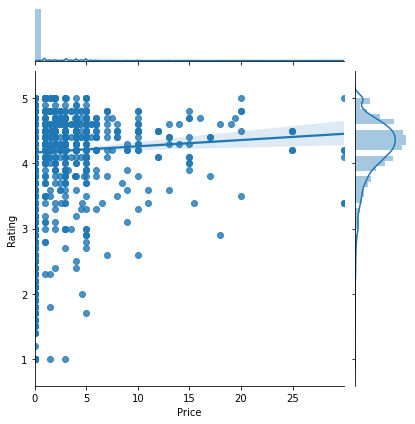

In [42]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

b. What pattern do you see?

-Although the Price of an Apps increases, Rating remains almost constant at slightly greater than 4.

c. How do you explain the pattern?

-Since on increasing the Price, Rating remains almost constant at greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price. That is the slope of  the regression line is slightly positive.

d. Replot the data, this time with only records with price > 0.

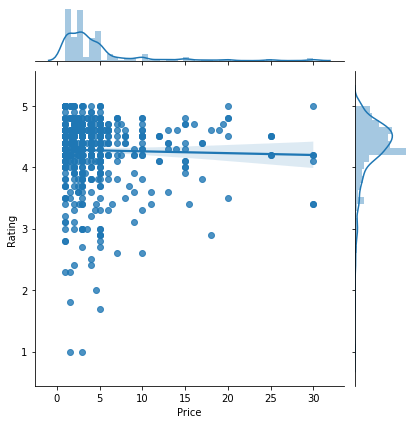

In [43]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

e. Does the pattern change?

-Yes, On limiting the record with Price > 0, the overall pattern changed slightly. Their is very weakly Negative Correlation between Price and Rating. That is the slope of  the regression line is slightly negative.


f. What is your overall inference on the effect of price on the rating?

-Usaually the price of the apps does not affect its rating as thier is very less change in the rating of apps for any changes in its price.

9. Look at all the numeric interactions together

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'.

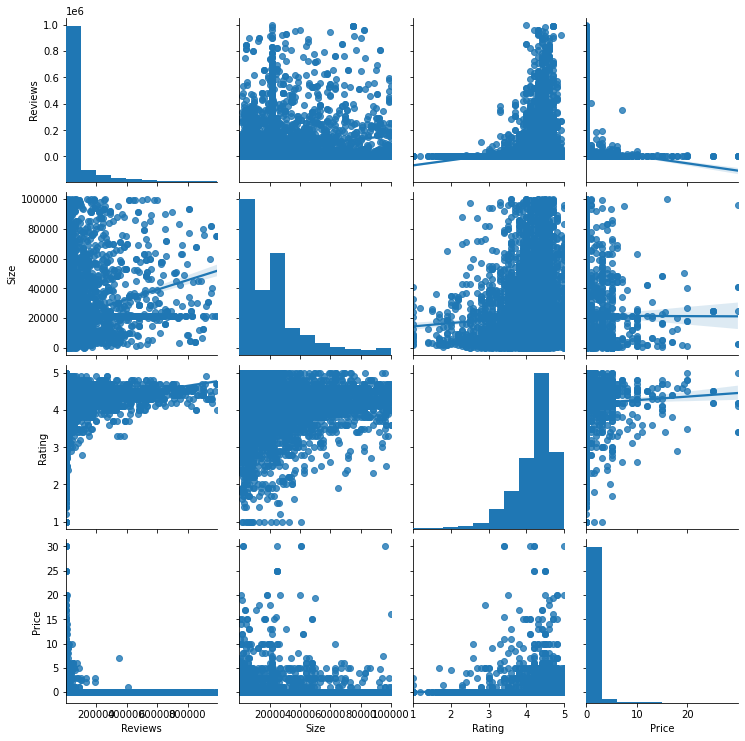

In [44]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

10. Rating vs. content rating.

a. Make a bar plot displaying the rating for each content rating.

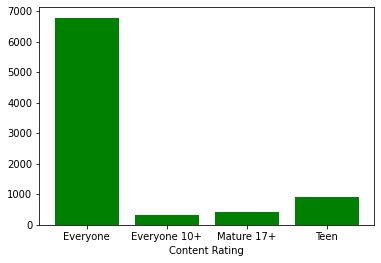

In [45]:
dfp=df.groupby(['Content Rating'])['Rating'].count()
plt.bar(dfp.index,dfp.values,color="green")
plt.xlabel('Content Rating')
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

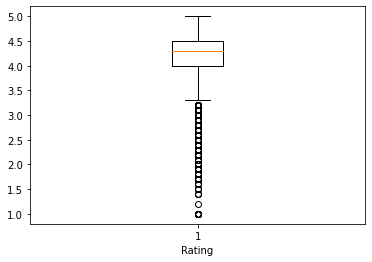

In [46]:
plt.boxplot(df['Rating'])
plt.xlabel('Rating')
plt.show()

-We must use Median in this case as we have Outliers in Rating. In case of Outliers , median is the best measure of central tendency.

c. Choose the right metric and plot.

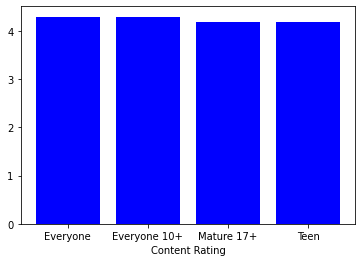

In [47]:
dfp1=df.groupby(['Content Rating'])['Rating'].median()
plt.bar(dfp1.index,dfp1.values,color="blue")
plt.xlabel('Content Rating')
plt.show()

11. Content rating vs. size vs. rating – 3 variables at a time.

a. Create 5 buckets (20% records in each) based on Size.

In [48]:
bkts=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bkts, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination.

In [49]:
dft3=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
dft3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


c. Make a heatmap of this.

> i. Annotated.

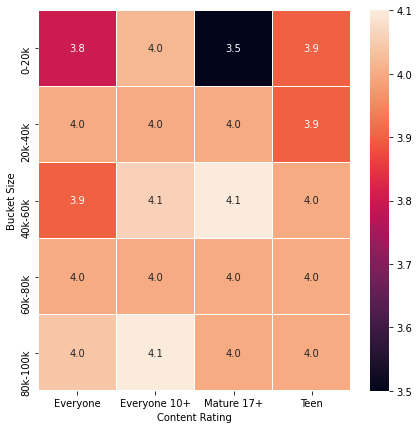

In [50]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(dft3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

> ii.Greens color map.

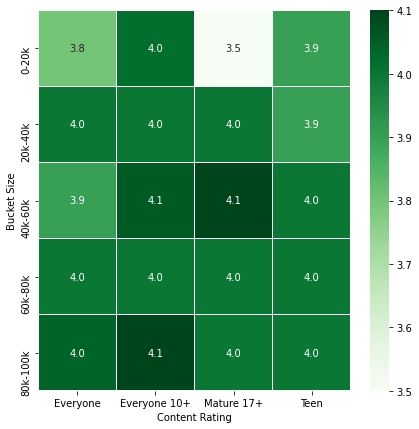

In [51]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(dft3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

-Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.